# Import Pretrained Models

In [3]:
import torch
from transformers import BertTokenizer,AutoModel
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')
model = AutoModel.from_pretrained("bert-base-multilingual-cased")


Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [4]:
# output['last_hidden_state'].shape

In [5]:
# output

In [6]:
# output['pooler_output'].shape

# Define Model for pretraining

In [43]:
from torch import nn


class BertPreTrainedSentiment(nn.Module):
    
    def __init__(self,hid1,hid2,hid3):
        super().__init__()
        
        self.checkpoint = 'bert-base-multilingual-cased'
        self.pretrainedBert = AutoModel.from_pretrained("bert-base-multilingual-cased")
        
        self.linear1 = nn.Linear(768,hid1)
        self.linear2 = nn.Linear(hid1,hid2)
        self.linear3 = nn.Linear(hid2,hid3)
        self.linear4 = nn.Linear(hid3,3)
        self.dropout = nn.Dropout(0.1)
        self.act = nn.ReLU()
        
        
    def forward(self,X):
        y_temp = self.pretrainedBert(X)
        y_temp = self.act(self.linear2(self.dropout(self.act(self.linear1(y_temp['pooler_output'])))))
        y_temp = self.dropout(self.linear3(y_temp))
        y = self.linear4(self.act(y_temp))
        
        
        return y
        
    

In [44]:
# from transformers import BertTokenizer
# tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')



# nepali_seq = 'यसको प्रभाव विगत दुई वर्षहरुमा पनि देखा पर्‍यो।'
# ids = tokenizer(nepali_seq)['input_ids']

# input_ids = torch.tensor([ids])

In [45]:
# input_ids

In [46]:
# m = BertPreTrainedSentiment(200,800)

In [47]:
# output = m(input_ids)

In [48]:
# output

In [49]:
# sm = nn.Softmax(dim=1)

In [50]:
# p_output = sm(torch.tensor([[5.,3.,1.]]))

In [17]:
# p_output

# Looking at the Data

In [18]:
import numpy as np
%pip install pandas
%pip install nltk


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [19]:
import pandas as pd

In [20]:
data = pd.read_csv('all_sentimental_data.csv')

In [21]:
data.sample(3)

,text,label
1099,युद्ध त तिमी र म बिच थियो,2
1441,कडा जवाफ पो आयो त साङ्लो बोरो,2
8560,सुरु देखि अहिले सम्म न छुताइ हेर्ने म मात्र ...,2


In [22]:
data.head()

,text,label
0,यो समान राम्रो रहेछ,1
1,समान राम्रो रहेछ,1
2,राम्रो रहेछ,1
3,यो घडी मलाइ साँच्चिकै सुहाउछ । म यसलाई खरीद गर...,1
4,साँच्चिकै सुहाउछ,1


In [23]:
data[data.isnull().any(axis=1)]

,text,label
6055,NaN,0
9149,NaN,0


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10171 entries, 0 to 10170
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    10169 non-null  object
 1   label   10171 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 159.0+ KB


In [25]:
data.dropna(axis = 0, inplace = True)

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10169 entries, 0 to 10170
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    10169 non-null  object
 1   label   10169 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 238.3+ KB


In [27]:
data.label.value_counts()

1    3965
0    3702
2    2502
Name: label, dtype: int64

# Text Preprocessing

In [28]:
# %pip install nepalitokenizer
# %pip install nepali-stemmer
# %pip install importlib_resources

In [32]:
# from nepali_stemmer.stemmer import NepStemmer
# from nepalitokenizer import NepaliTokenizer
# nepstem = NepStemmer()
# tokenize = NepaliTokenizer()
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import regex as re
def text_preprocessing(text, nepali_stopwords = stopwords.words('nepali')):
    # Tokenize the reviews
    text = text.split()
    # Remove the nepali stopwords
    text = [word for word in text if word not in nepali_stopwords]
    text = ' '.join(text)
    # Stemming the nepali words
#     text = nepstem.stem(text)
    # Remove the leading and trailing spaces
#     text = text.split()
#     text = ' '.join(text)  
    return text



def pure_nepali(text):
    text = re.sub(r'\s*[\u0964]\s*', r'\u0020\u0964\u0020', text)
    text = re.sub(r'\s*[\u003f]\s*', r'\u0020\u003f\u0020', text)
    text = re.sub(r'\s*[\u002c]\s*', r'\u0020\u003f\u0020', text)
    text = re.sub(r'\s*\n\s*','\n', text)
    text = re.sub(r'[^\u0900-\u097F,?\s+]','', text)
    return text

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [40]:
X = data["text"].apply(pure_nepali)


In [41]:
X = X.apply(text_preprocessing)
y = data["label"]

In [52]:
X.info()

<class 'pandas.core.series.Series'>
Int64Index: 10169 entries, 0 to 10170
Series name: text
Non-Null Count  Dtype 
--------------  ----- 
10169 non-null  object
dtypes: object(1)
memory usage: 158.9+ KB


In [53]:
%pip install scikit-learn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 101)

Note: you may need to restart the kernel to use updated packages.


In [54]:
print(f"Train size =  {len(X_train)}")
print(f"Test size =  {len(X_test)}")


Train size =  8135
Test size =  2034


In [56]:
# t = tokenizer(list(X_train),padding = 'max_length',max_length = 32,truncation=True)

In [57]:
max_length = 64

batch_size = 32
rem = len(X_train)%batch_size
t = tokenizer(list(X_train),padding = 'max_length',max_length =max_length,truncation=True)
torch.cuda.memory_allocated()

0

In [58]:
ids = t['input_ids']
device = 'cuda' if torch.cuda.is_available() else 'cpu'



input_ids = torch.tensor(ids)[:-rem,:]
print(input_ids.shape)
batched_ids = input_ids.reshape(-1,batch_size,max_length)


batched_ids.shape

torch.Size([8128, 64])


torch.Size([254, 32, 64])

In [59]:
targets = torch.tensor(list(y_train))[:-rem]
targets = targets.reshape(-1,batch_size)

# Instantiate a model and train 

In [60]:
model = BertPreTrainedSentiment(480,180,60).to(device)

Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [268]:
criterion = nn.CrossEntropyLoss()
lr = 0.01  # learning rate
optimizer = torch.optim.SGD(model.parameters(), lr=lr)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, 1.0, gamma=0.95)

In [2]:
def train(model: nn.Module) -> None:
    model.train()  # turn on train mode
    total_loss = 0.
    log_interval = 50
    start_time = time.time()
#     src_mask = generate_square_subsequent_mask(bptt).to(device)
    for i in range(0, batched_ids.size(0)):
        data = batched_ids[i]
        targets_ = targets[i]
#         batch_size = data.size(0)
#         if batch_size != bptt:  # only on last batch
#             src_mask = src_mask[:batch_size, :batch_size]
        output = model(data.to(device))
        loss = criterion(output.view(-1, 3), targets_.to(device))

        optimizer.zero_grad()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 0.5)
        optimizer.step()
        
        total_loss += loss.item()
        if i % log_interval == 0 and i > 0:
            lr = scheduler.get_last_lr()[0]
            ms_per_batch = (time.time() - start_time) * 1000 / log_interval
            cur_loss = total_loss / log_interval
            print(f'| epoch {epoch:3d} | {i:5d}/{batched_ids.size(0):5d} batches | '
                  f'lr {lr:02.2f} | ms/batch {ms_per_batch:5.2f} | '
                  f'loss {cur_loss:5.2f} |')
            total_loss = 0
            start_time = time.time()
        torch.cuda.empty_cache()
    

NameError: name 'nn' is not defined

In [270]:
batched_ids[0].shape

torch.Size([32, 64])

In [271]:
sm = nn.Softmax(dim=1)

In [272]:
# import copy
import time
epochs = 10
for epoch in range(1, epochs + 1):
    epoch_start_time = time.time()
    train(model)
    



| epoch   1 |    50/  254 batches | lr 0.01 | ms/batch 469.97 | loss  0.23 |
| epoch   1 |   100/  254 batches | lr 0.01 | ms/batch 464.22 | loss  0.24 |
| epoch   1 |   150/  254 batches | lr 0.01 | ms/batch 466.20 | loss  0.16 |
| epoch   1 |   200/  254 batches | lr 0.01 | ms/batch 467.67 | loss  0.16 |
| epoch   1 |   250/  254 batches | lr 0.01 | ms/batch 468.85 | loss  0.18 |
| epoch   2 |    50/  254 batches | lr 0.01 | ms/batch 478.96 | loss  0.23 |
| epoch   2 |   100/  254 batches | lr 0.01 | ms/batch 470.22 | loss  0.22 |
| epoch   2 |   150/  254 batches | lr 0.01 | ms/batch 470.30 | loss  0.15 |
| epoch   2 |   200/  254 batches | lr 0.01 | ms/batch 470.72 | loss  0.16 |
| epoch   2 |   250/  254 batches | lr 0.01 | ms/batch 470.27 | loss  0.21 |
| epoch   3 |    50/  254 batches | lr 0.01 | ms/batch 480.00 | loss  0.21 |
| epoch   3 |   100/  254 batches | lr 0.01 | ms/batch 470.42 | loss  0.23 |
| epoch   3 |   150/  254 batches | lr 0.01 | ms/batch 470.12 | loss  0.16 |

In [273]:
nepali_seq = 'यसको प्रभाव विगत दुई वर्षहरुमा पनि देखा पर्‍यो।'
ids = tokenizer(nepali_seq,padding = 'max_length',max_length=64,truncation = True)['input_ids']

input_ids = torch.tensor([ids])

In [274]:
torch.save(model.state_dict(),'model_after_pure_nepali9.pt')

# Evaluation

In [275]:
model.eval()


o = model(input_ids.to(device))

In [276]:
y = sm(o)

In [277]:
y

tensor([[0.2175, 0.6407, 0.1418]], device='cuda:0', grad_fn=<SoftmaxBackward0>)

In [278]:
def batched_indices(X,y):
    rem = len(X)%batch_size
    
    t = tokenizer(X,padding = 'max_length',max_length =max_length,truncation=True)
    ids = t['input_ids']

    input_ids = torch.tensor(ids)[:-rem,:]
    batched_ids = input_ids.reshape(-1,batch_size,max_length)
    targets = torch.tensor(y)[:-rem]
    targets = targets.reshape(-1,batch_size)
    
    return batched_ids,targets

In [279]:
b,t = batched_indices(list(X_test),list(y_test))

In [280]:
i = 8

In [281]:
y = sm(model(b[i].to(device))).argmax(-1)

In [282]:
y

tensor([0, 2, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 2, 2, 1, 1, 1, 2, 0, 2, 1, 1, 1, 1,
        0, 1, 0, 1, 0, 0, 0, 0], device='cuda:0')

In [283]:
sum(t[i].to(device) == y)

tensor(27, device='cuda:0')

In [284]:
t[i]

tensor([0, 2, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 0, 2, 1, 1, 0, 1,
        0, 1, 0, 1, 0, 0, 0, 0])

In [285]:
#True Positive
sum(t[i].to(device) == y)/32

tensor(0.8438, device='cuda:0')

In [286]:
b[0]

tensor([[   101,  32629, 111200,  ...,  35133,  11554,    102],
        [   101,    889,  11453,  ...,      0,      0,      0],
        [   101,  26876,    887,  ...,      0,      0,      0],
        ...,
        [   101,  26876,  12512,  ...,  11267, 101841,    102],
        [   101,    889,  14070,  ...,  41013,    920,    102],
        [   101,    871,  12878,  ...,      0,      0,      0]])

In [287]:
true_positive = 0
y_all = None
for i in range(len(b)):
    y = sm(model(b[i].to(device))).argmax(-1)
    if (y_all == None):
        y_all = y
    else:
        y_all = torch.cat((y_all,y))
    true_positive += (sum(t[i].to(device) == y)/32)
avg_true_positive = true_positive/len(b)

print(avg_true_positive)

tensor(0.6741, device='cuda:0')


In [288]:
y_all[:64],sm(model(b[1].to(device))).argmax(-1),t.reshape(-1)[:64]

(tensor([0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 2, 1, 2, 0, 0, 1, 0, 2, 1, 0, 0, 0, 1, 0,
         0, 0, 0, 1, 2, 0, 0, 0, 0, 1, 1, 0, 1, 2, 0, 0, 1, 1, 1, 1, 2, 1, 1, 1,
         2, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 0, 1, 2], device='cuda:0'),
 tensor([0, 1, 1, 0, 1, 2, 0, 0, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 0, 0, 1, 1, 1,
         1, 1, 1, 2, 2, 0, 1, 2], device='cuda:0'),
 tensor([0, 2, 2, 0, 0, 0, 1, 1, 1, 2, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 2, 0, 0, 1,
         2, 0, 0, 1, 2, 0, 0, 0, 0, 2, 1, 0, 2, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
         0, 2, 2, 0, 0, 2, 1, 1, 2, 1, 1, 0, 0, 0, 1, 2]))

In [289]:
#0.62..
#0.6523
#0.6438
#0.6409
#0.6553

#0.6285
#0.6349

#dropout
#0.6305
#0.6493
#0.6523
#0.6617
#0.6558

[Text(0.5, 23.52222222222222, 'Predicted'),
 Text(50.722222222222214, 0.5, 'True'),
 Text(0.5, 1.0, 'Confusion matrix for the model')]

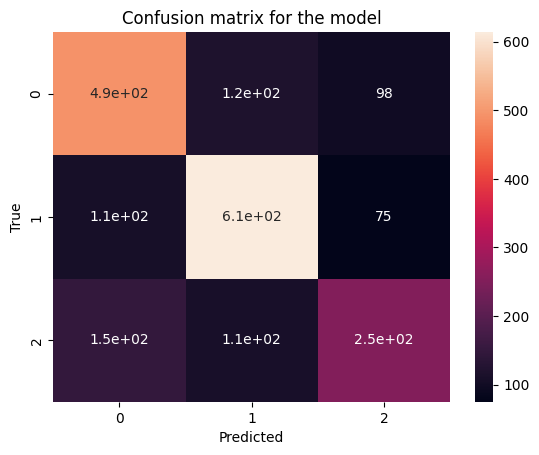

In [290]:
from sklearn.metrics import confusion_matrix, classification_report
#%pip install seaborn
import seaborn as sns
#import matplotlib.plot as plt

test_pred = list(y_all.to('cpu'))
test_true = list(t.reshape(-1).to('cpu'))
cm = confusion_matrix(y_true = test_true, y_pred = test_pred)
cm_heatmap = sns.heatmap(cm, annot = True)
cm_heatmap.set(xlabel = "Predicted", ylabel = "True", title = "Confusion matrix for the model")
# plt.show()
     

In [291]:
print(classification_report(y_true = test_true, y_pred = test_pred, target_names = ['Negative', 'Positive', 'Neutral']))

              precision    recall  f1-score   support

    Negative       0.66      0.69      0.68       709
    Positive       0.73      0.77      0.75       797
     Neutral       0.59      0.50      0.54       510

    accuracy                           0.67      2016
   macro avg       0.66      0.65      0.66      2016
weighted avg       0.67      0.67      0.67      2016

